In [40]:
# pip install numpy==1.24

  Using cached numpy-1.24.0-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.12.2 requires numpy!=1.24.0,>=1.17, but you have numpy 1.24.0 which is incompatible.


In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
from sklearn.manifold import TSNE
from umap import umap_

In [2]:
dataset = pd.read_csv('../data/googleplaystore.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
dataset.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
dataset = dataset[dataset['Rating'] <= 5]

In [7]:
sorted_first = dataset
sorted_first['Reviews'] = pd.to_numeric(sorted_first['Reviews'], errors='coerce').fillna(0).astype(float)
sorted_first['Rating'] = pd.to_numeric(sorted_first['Rating'], errors='coerce').fillna(0).astype(float)
sorted_first = dataset.sort_values(by=['Rating', 'Reviews'])
fig = go.Figure()
fig.add_trace(
    go.Bar(x=sorted_first['Rating'], y=sorted_first['Reviews'],
           marker=dict(color=sorted_first['Rating'], coloraxis="coloraxis"),
           marker_line=dict(color='black', width=0.2)))
fig.update_layout(title=dict(text='Отношение оценок к отзывам', x=0.5, y=1, font=dict(size=20)),
                  xaxis=dict(title=dict(text='Оценки',
                                        font=dict(size=16)),
                             tickangle=315,
                             tickfont=dict(size=14),
                             gridwidth=2,
                             gridcolor='ivory'),
                  yaxis=dict(title=dict(text='Количество',
                                        font=dict(size=16)),
                             tickfont=dict(size=14),
                             gridwidth=2,
                             gridcolor='ivory'),
                  height=700,
                  margin=dict(l=0, r=0, t=0, b=0),
                  xaxis_showgrid=True, yaxis_showgrid=True,
                  xaxis_linecolor='white', yaxis_linecolor='white',
                  showlegend=False)
fig.show()

In [200]:
sorted_second = dataset.copy().head(100)
sorted_second['Size'] = sorted_second['Size'].str.replace('Varies with device', '0')


def convert_size(size_str):
    if 'k' in size_str:
        return float(size_str.replace('k', '')) / 1000
    elif 'M' in size_str:
        return float(size_str.replace('M', ''))
    else:
        return float(size_str)


sorted_second['Size'] = sorted_second['Size'].apply(convert_size)
sorted_second['Rating'] = pd.to_numeric(sorted_second['Rating'], errors='coerce').fillna(0).astype(float)
sorted_second = sorted_second.sort_values(by=['Last Updated'])
sorted_second.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
43,Paint Splash!,ART_AND_DESIGN,3.8,2206.0,1.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829.0,20.0,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
41,Sad Poetry Photo Frames 2018,ART_AND_DESIGN,4.5,176.0,10.0,"100,000+",Free,0,Everyone,Art & Design,"April 2, 2018",1.0,4.0.3 and up
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450.0,14.0,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288.0,4.5,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 21, 2018",2.17,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790.0,14.0,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260.0,25.0,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
66,Used Cars Mexico,AUTO_AND_VEHICLES,4.0,190.0,2.5,"50,000+",Free,0,Everyone,Auto & Vehicles,"October 14, 2016",1.0,2.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880.0,28.0,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


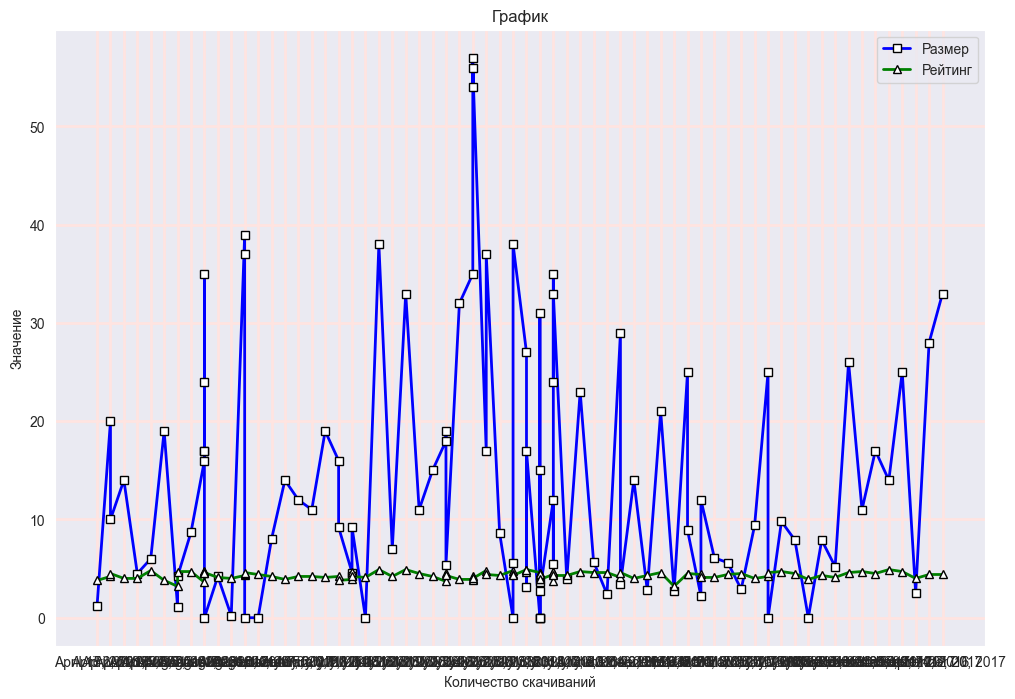

In [201]:
plt.figure(figsize=(12, 8))
plt.plot(sorted_second['Last Updated'], sorted_second['Size'], label='Размер', color='blue', marker='s', markersize=6,
         markeredgecolor='black', markerfacecolor='white', linewidth=2)
plt.plot(sorted_second['Last Updated'], sorted_second['Rating'], label='Рейтинг', color='green', marker='^',
         markersize=6, markeredgecolor='black', markerfacecolor='white', linewidth=2)

plt.title('График')
plt.xlabel('Количество скачиваний')
plt.ylabel('Значение')
plt.grid(linewidth=2, color='mistyrose')
plt.legend()

plt.show()

In [202]:
count_datas = dataset['Content Rating'].value_counts()
result_df = pd.DataFrame({'Имя': count_datas.index, 'Количество': count_datas.values})
result_df

,Имя,Количество
0,Everyone,7420
1,Teen,1084
2,Mature 17+,461
3,Everyone 10+,397
4,Adults only 18+,3
5,Unrated,1


In [203]:
fig_pi = go.Figure()
fig_pi.add_trace(
    go.Pie(labels=result_df['Имя'], values=result_df['Количество'],
           marker=dict(line=dict(color='black', width=2)),
           textinfo='label+percent',
           insidetextorientation='radial'))
fig_pi.update_layout(
    title=dict(text='Процент игроков по жанрам',  # Заголовок диаграммы
               x=0.5,  # Положение заголовка по горизонтали
               y=1,  # Положение заголовка по вертикали
               font=dict(size=20)),  # Размер шрифта заголовка
    showlegend=False,  # Скрыть легенду
    width=1200, height=700,  # Размеры графика
)

fig_pi.show()

In [204]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [205]:
data = dataset.drop(['Current Ver', 'Last Updated', 'Type', 'App'], axis=1)
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce').fillna(0).astype(float)
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce').fillna(0).astype(float)

for i in data:
    if i not in 'RatingReviews':
        data[f'{i}'] = pd.factorize(data[f'{i}'])[0]
scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
sc = preprocessing.MinMaxScaler()
dataset['Type'] = pd.factorize(dataset[f'Type'])[0]
data

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Android Ver
0,0.00000,0.775,2.021538e-06,0.000000,0.000000,0.0,0.0,0.000000,0.032258
1,0.00000,0.725,1.235953e-05,0.002421,0.055556,0.0,0.0,0.008772,0.032258
2,0.00000,0.925,1.119638e-03,0.004843,0.111111,0.0,0.0,0.000000,0.032258
3,0.00000,0.875,2.759054e-03,0.007264,0.166667,0.0,0.2,0.000000,0.064516
4,0.00000,0.825,1.235953e-05,0.009685,0.222222,0.0,0.0,0.017544,0.096774
...,...,...,...,...,...,...,...,...,...
9361,0.56250,0.750,7.676727e-08,0.157385,0.777778,0.0,0.0,0.105263,0.193548
9362,0.56250,0.875,4.733982e-07,0.276029,0.444444,0.0,0.0,0.105263,0.193548
9363,0.56250,1.000,3.838364e-08,0.099274,0.722222,0.0,0.0,0.105263,0.193548
9364,0.09375,0.875,1.445784e-06,0.067797,0.611111,0.0,0.6,0.043860,0.290323


In [206]:
# Выполнить визуализацию многомерных данных, используя t-SNE.Рассмотреть
# результаты визуализации для разных значений перплексии. Для своего датасета. Чтоб на графике было видно классы

KeyboardInterrupt: 

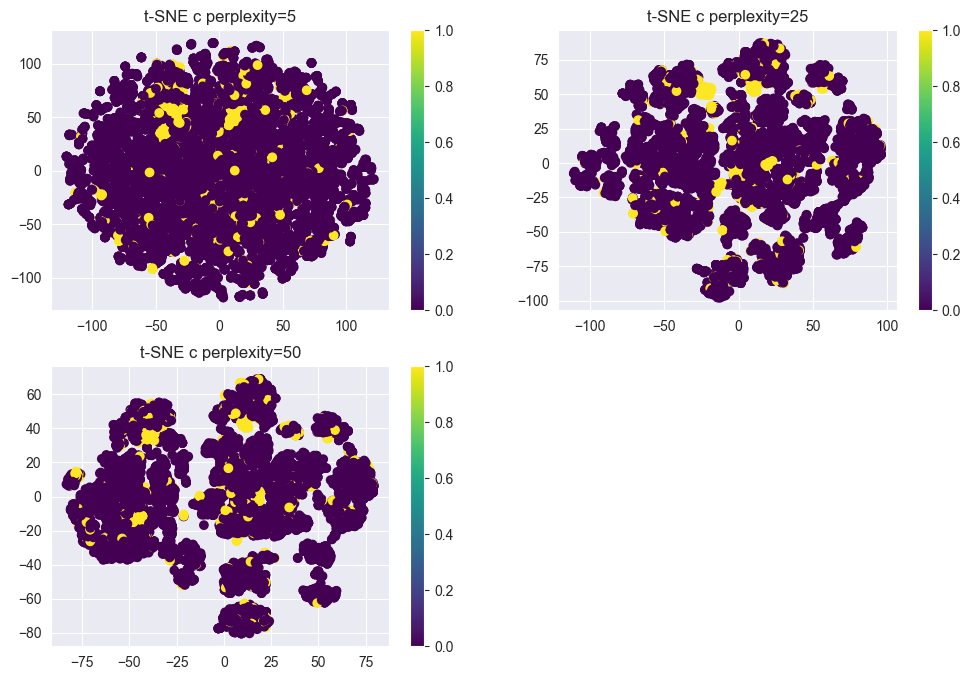

In [209]:
perplexities = [5, 25, 50, 100]

# Создайте график с несколькими подграфиками для каждой перплексии
plt.figure(figsize=(12, 8))
for i, perplexity in enumerate(perplexities):
    # Выполните t-SNE с текущим значением перплексии
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(data)

    # Создайте подграфик для текущей перплексии
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=dataset['Type'], cmap='viridis')
    plt.title(f't-SNE с perplexity={perplexity}')
    plt.colorbar()
plt.tight_layout()
plt.show()

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



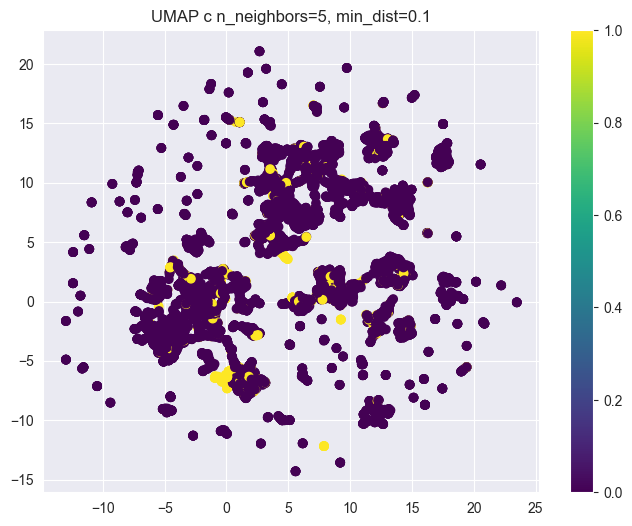

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



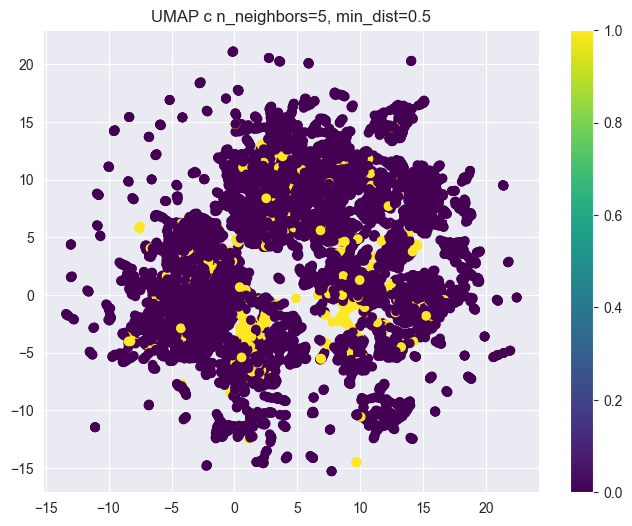

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



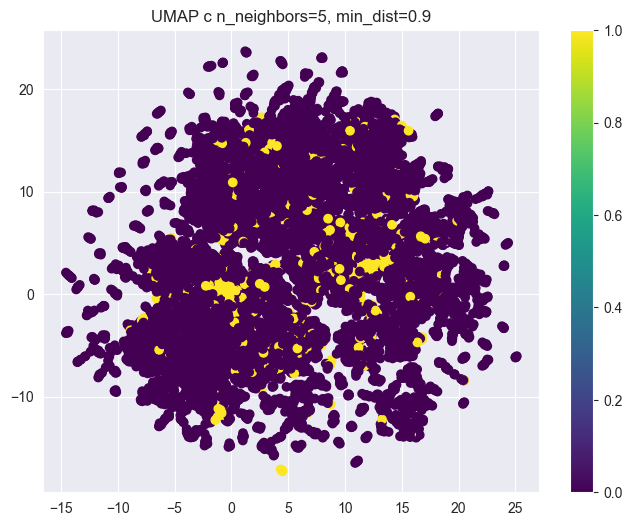

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



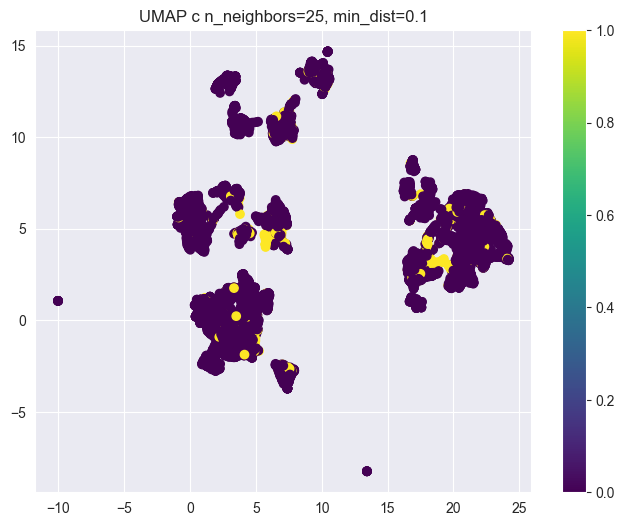

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



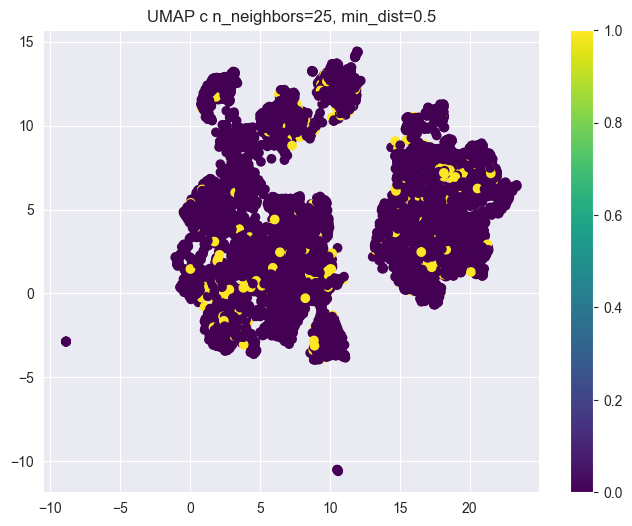

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



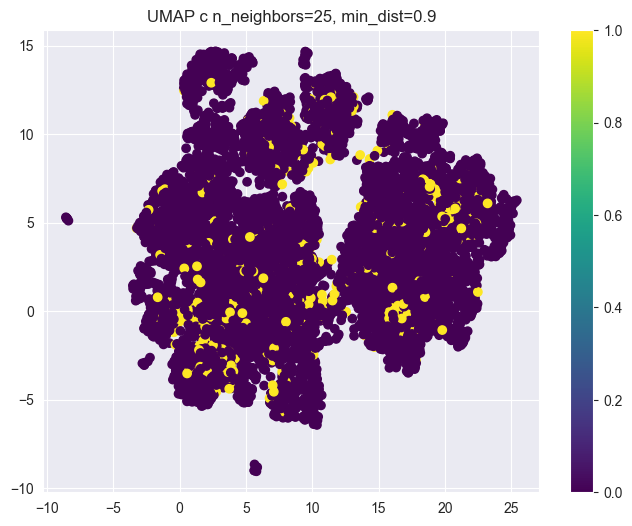

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



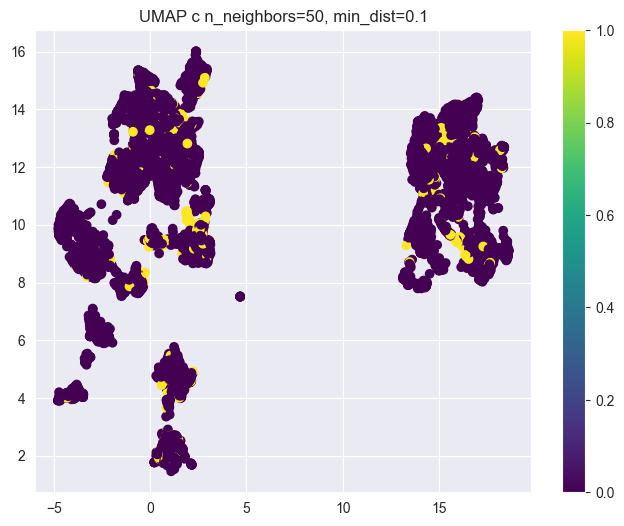

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



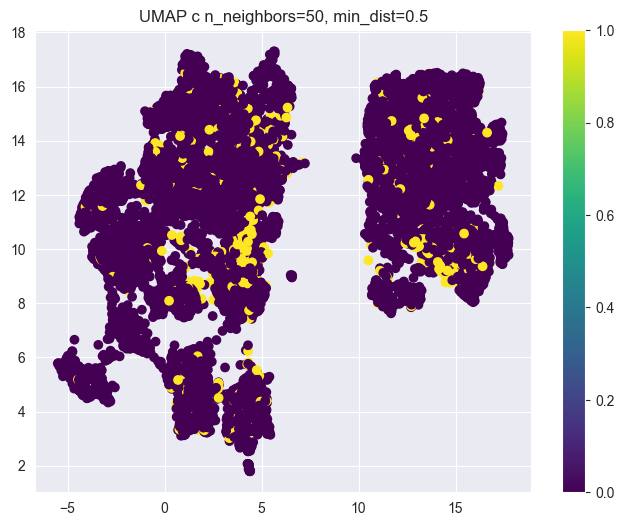

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



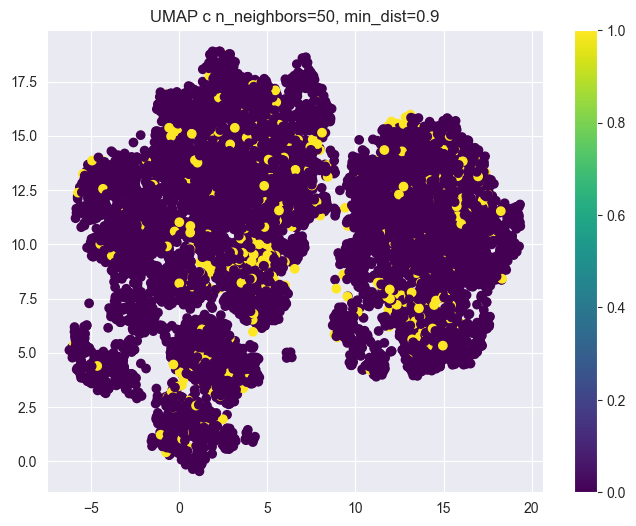

UMAP (n_neighbors=5, min_dist=0.1): 9.05 seconds
t-SNE: 45.86 seconds

UMAP (n_neighbors=5, min_dist=0.5): 8.52 seconds
t-SNE: 42.47 seconds

UMAP (n_neighbors=5, min_dist=0.9): 8.67 seconds
t-SNE: 39.79 seconds

UMAP (n_neighbors=25, min_dist=0.1): 18.97 seconds
t-SNE: 46.58 seconds

UMAP (n_neighbors=25, min_dist=0.5): 17.30 seconds
t-SNE: 41.91 seconds

UMAP (n_neighbors=25, min_dist=0.9): 17.18 seconds
t-SNE: 45.63 seconds

UMAP (n_neighbors=50, min_dist=0.1): 22.78 seconds
t-SNE: 42.88 seconds

UMAP (n_neighbors=50, min_dist=0.5): 22.79 seconds
t-SNE: 42.16 seconds

UMAP (n_neighbors=50, min_dist=0.9): 22.46 seconds
t-SNE: 42.49 seconds



In [208]:
n_neighbors_values = [5, 25, 50]
min_dist_values = [0.1, 0.5, 0.9]

# Сравнение времени работы UMAP и t-SNE
tsne_time = []
umap_time = []

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        # Выполнение t-SNE и измерение времени
        start_time = time.time()
        tsne = TSNE(n_components=2, perplexity=30, random_state=42)
        X_embedded_tsne = tsne.fit_transform(data)
        tsne_time.append(time.time() - start_time)

        # Выполнение UMAP и измерение времени
        start_time = time.time()
        umap = umap_.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        X_embedded_umap = umap.fit_transform(data)
        umap_time.append(time.time() - start_time)


        # Создайте график для текущих параметров UMAP
        plt.figure(figsize=(8, 6))
        plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1], c=dataset['Type'], cmap='viridis')
        plt.title(f'UMAP с n_neighbors={n_neighbors}, min_dist={min_dist}')
        plt.colorbar()
        plt.show()

# Вывод времени работы
for i in range(len(n_neighbors_values)):
    for j in range(len(min_dist_values)):
        idx = i * len(min_dist_values) + j
        print(
            f'UMAP (n_neighbors={n_neighbors_values[i]}, min_dist={min_dist_values[j]}): {umap_time[idx]:.2f} seconds')
        print(f't-SNE: {tsne_time[idx]:.2f} seconds')
        print()

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

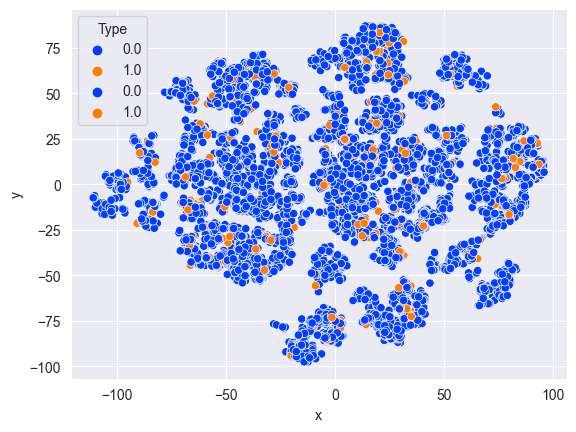

In [150]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data_copy = data.copy()
T = TSNE(n_components=2, perplexity=25, random_state=123)
TSNE_feature = T.fit_transform(data)
DATA = data.copy()
DATA['x'] = TSNE_feature[:, 0]
DATA['y'] = TSNE_feature[:, 1]
fig = plt.figure()
# Создание scatter plot (графика с точками) с использованием библиотеки seaborn
# Точки будут разделены по цветам в соответствии с столбцом 'Type' из датасета 'dataset'
# и будет использована цветовая палитра 'bright'
sns.scatterplot(x='x', y='y', hue=dataset['Type'], data=DATA, palette='bright')
sns.scatterplot(x='x', y='y', hue=dataset['Type'], data=DATA, palette='bright')
plt.show()

In [51]:
fig = px.scatter(x=dataset['Rating'], y=dataset['Installs'])
fig.show()

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



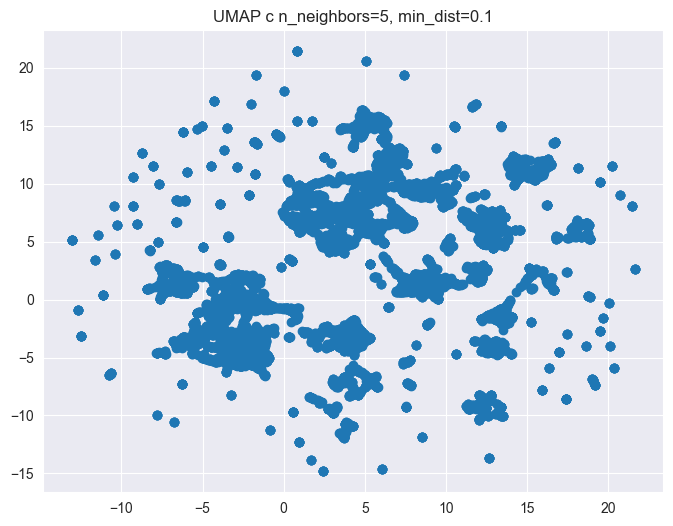

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



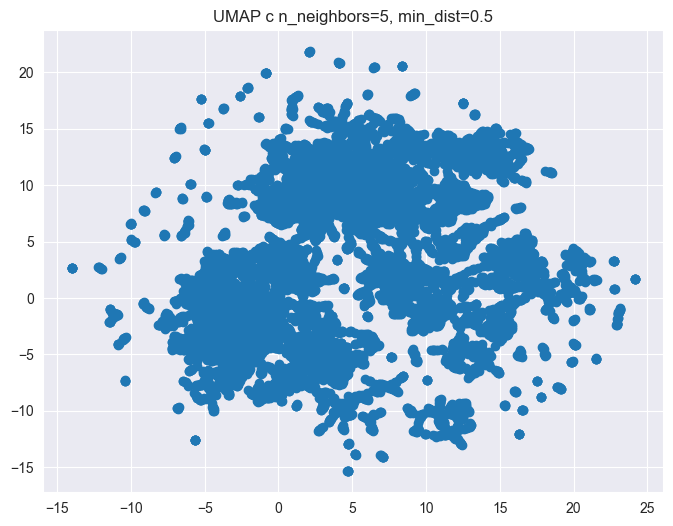

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



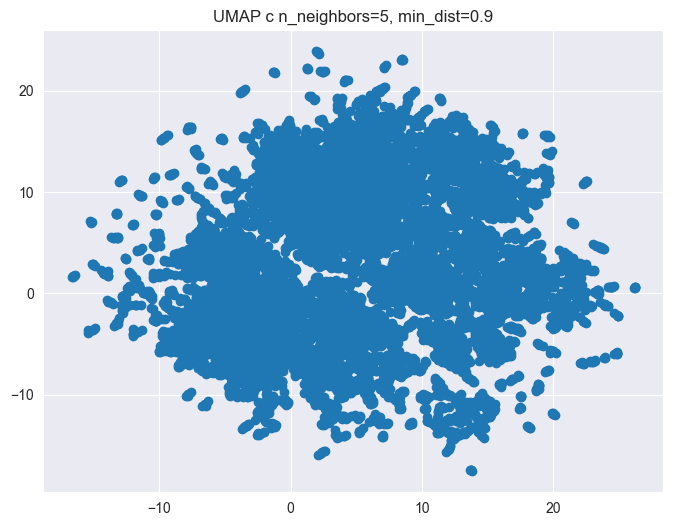

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



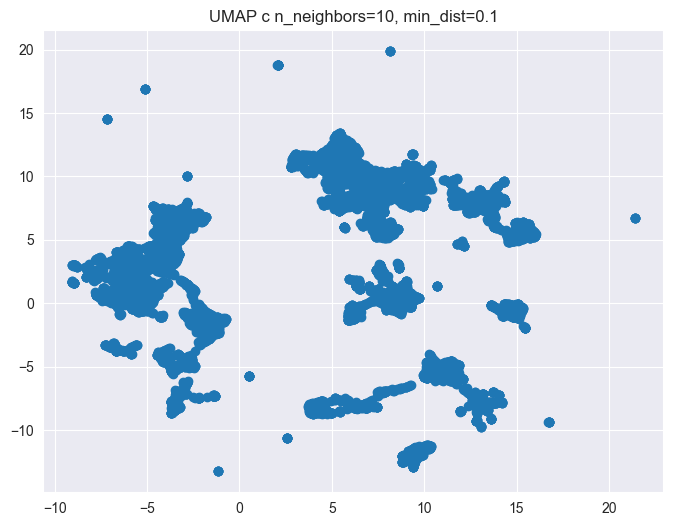

KeyboardInterrupt: 

In [58]:
# import matplotlib.pyplot as plt
# import time
# from sklearn.manifold import TSNE
# from umap import umap_
#
#
# n_neighbors_values = [5, 10, 15]
# min_dist_values = [0.1, 0.5, 0.9]
#
# tsne_time = []
# umap_time = []
#
# for n_neighbors in n_neighbors_values:
#     for min_dist in min_dist_values:
#         start_time = time.time()
#         tsne = TSNE(n_components=2, perplexity=30, random_state=42)
#         X_embedded_tsne = tsne.fit_transform(data)
#         tsne_time.append(time.time() - start_time)
#
#         start_time = time.time()
#         umap = umap_.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
#         X_embedded_umap = umap.fit_transform(data)
#         umap_time.append(time.time() - start_time)
#
#         plt.figure(figsize=(8, 6))
#         plt.scatter(X_embedded_umap[:, 0], X_embedded_umap[:, 1])
#         plt.title(f'UMAP с n_neighbors={n_neighbors}, min_dist={min_dist}')
#         plt.show()
#
# for i in range(len(n_neighbors_values)):
#     for j in range(len(min_dist_values)):
#         idx = i * len(min_dist_values) + j
#         print(
#             f'UMAP (n_neighbors={n_neighbors_values[i]}, min_dist={min_dist_values[j]}): {umap_time[idx]:.2f} seconds')
#         print(f't-SNE: {tsne_time[idx]:.2f} seconds')
#         print()
